# <b> Chapter 8 

In [128]:
from typing import Callable, List
import matplotlib.pyplot as plt
import numpy as np
import math

## Estimating the Gradient

- Newton's difference quotient (also known as a first-order divided difference):

$$
{\displaystyle f'(a)=\lim _{h\to 0}{\frac {f(a+h)-f(a)}{h}}}
$$

- Lmao

In [129]:
# Defining the derivative and log functions


def divided_difference(f: Callable, a: float, h: float) -> float:
    """Estimates the derivative of a function by approximation"""
    return (f(a + h) - f(a)) / h


def partial_divided_difference(f: Callable, v: np.ndarray, i: int, h: float) -> float:
    """Returns the divided difference of the i-th quotient of f at v"""
    w = v.copy()
    w[i] += h
    return (f(w) - f(v)) / h


def estimate_gradient(f: Callable, v: np.ndarray, h: float) -> List:
    return [partial_divided_difference(f, v, i, h) for i in range(len(v))]


def log_derivative(x: float, b: float) -> float:
    """Calculates the derivative of a log"""
    return 1 / (x * math.log(b))

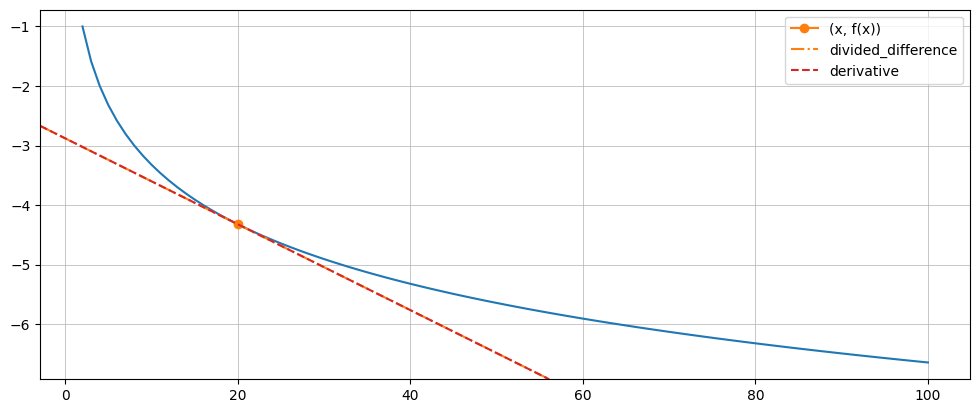

In [132]:
# Example of an approximation a derivative of f(20) = log_1/2(20) with the difference quotient


h = 1e-2
xs = [x for x in range(100, 1, -1)]
ys = [log(x) for x in xs]
b = 1 / 2
def log(x): return math.log(x, b)


plt.figure().set_figwidth(12)
plt.plot(xs, ys)
plt.plot(20, log(20), marker='o', label='(x, f(x))')
plt.axline([20, log(20)], slope=divided_difference(log, 20, h),
           c='C1', label="divided_difference", linestyle='-.')
plt.axline([20, log(20)], slope=log_derivative(20, b),
           c='C3', label='derivative', linestyle='--')

plt.grid(linewidth=0.5)
plt.legend()
plt.show()